# Logistic Regression Analysis on Airline Customer Satisfaction

## Introduction


For this Project, I work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like me to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this project is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. My goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, I will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this Project, I will do the following steps:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Using `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [130]:
#Import packages
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics


import seaborn as sns 
import matplotlib.pyplot as plt


### Load the dataset

In [132]:
# RUN THIS CELL TO IMPORT THE DATA.
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

Dislplaying the first 10 rows of data.

In [134]:
#Display first 10 rows
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Preparing the data

After loading the dataset, I will prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Exploring the data

Checking the data type of each column. "logistic regression models expect numeric data". 

In [137]:
#Check the data type of each column
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Checking the number of satisfied customers in the dataset

To predict customer satisfaction, checking how many customers in the dataset are satisfied before modeling is important.

In [139]:
#check how many customers in the dataset are satisfied.

satisfied_customers_count=df_original[df_original['satisfaction']=='satisfied'].count()['satisfaction']
dissatisfied_customers_count=df_original[df_original['satisfaction']=='dissatisfied'].count()['satisfaction']

print("Satisfied:",satisfied_customers_count, "\nDissatisfied:",dissatisfied_customers_count)

Satisfied: 71087 
Dissatisfied: 58793


There are `71087` `Satisfied` and `58793` `Dissatisfied`


Percentage of customers were satisfied

In [142]:
#Percentage of customers were satisfied.

satisfied_percentage=(71087/(71087+58793))*100
print(satisfied_percentage)

54.73283030489683


`54.73%` of passengers are satisfied 

### Checking for missing values

An assumption of logistic regression models is that there are no missing values.

In [146]:
#Check for null values.
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [147]:
#Identfy the percentage of the missing values in the data.

percentatge_of_nulls=(393/129880)*100
print("There is",round(percentatge_of_nulls,2),"% of the 'Arrival Delay in Minutes' data is missing.")

There is 0.3 % of the 'Arrival Delay in Minutes' data is missing.


There is about `0.3%`  of the `Arrival Delay in Minutes` data is missing, it's small amount of the data so we can remove it.

### Droping the rows with missing values

In [150]:
#Drop the rows with missing value.
df_subset=df_original.dropna()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             129487 no

### Preparing the data

Making the `Inflight entertainment` column "of type float." 

In [161]:
# Make the Inflight entertainment column "of type float."
df_subset.loc[:, 'Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)


### Converting the categorical column `satisfaction` into numeric

Converting the categorical column `satisfaction` into numeric through one-hot encoding.

In [165]:
#Convert the categorical column satisfaction into numeric through one-hot encoding.

df_subset.loc[:, 'satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

### Output the first 10 rows of `df_subset`

Displaying the first 10 rows of `df_subset` after one-hot encoding.

In [170]:
# Display the first 10 rows of df_subset after one-hot encoding.
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Creating the training and testing data

Putting 70% of the data into a training set and the remaining 30% into a testing set. Creating an X and y DataFrame with only the necessary variables.


In [54]:
# Rename the 'Inflight entertainment' column to 'Inflight_entertainment' for easier access
df_subset=df_subset.rename(columns={'Inflight entertainment':'Inflight_entertainment'})

# Create X (independent variable) DataFrame with 'Inflight_entertainment' and y (dependent variable) DataFrame with 'satisfaction'
x_data=df_subset[['Inflight_entertainment']]
y_data=df_subset[['satisfaction']]

# Split the data into training (70%) and testing (30%) sets, with random_state=42 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.3,random_state=42)

## Step 3: Model building

### Fitting a LogisticRegression model to the data

Building a logistic regression model and fitting the model to the training data. 

In [174]:
#Build a logistic regression model and fit the model to the training data.
clf = LogisticRegression().fit(x_train,y_train.values.ravel())

In [58]:
# Retrieve the coefficients (log-odds) from the logistic regression model
coefficients=clf.coef_
print('coef =',clf.coef_)

# Calculate the odds ratios by exponentiating the coefficients to interpret them more easily
odds_ratios = np.exp(coefficients)
print('odds ratios =',odds_ratios)

# Calculate the percentage change in odds based on the odds ratio
percentage_change=(odds_ratios[0][0])-1
print('percentage change =',round(percentage_change,2),"%")

# Calculate the probability from the odds ratio using the formula: odds/(1+odds)
probability = odds_ratios[0][0]/(1+odds_ratios[0][0])
print('probability =',round(probability*100,2),"%")

coef = [[0.99752883]]
odds ratios = [[2.71157278]]
percentage change = 1.71 %
probability = 73.06 %


In [59]:
clf.intercept_

array([-3.19359054])

### Creating a plot of the model

Creating a plot of the model to visualize results using the seaborn package.

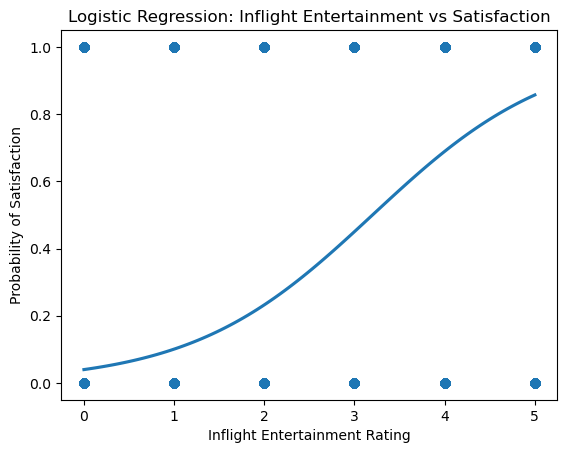

In [83]:
# Plot the relationship between Inflight_entertainment and satisfaction, controlling for Another_Variable
#sns.lmplot(x='Inflight_entertainment', y='satisfaction', hue='Another_var', data=df_subset)


sns.regplot(x="Inflight_entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Probability of Satisfaction')
plt.title('Logistic Regression: Inflight Entertainment vs Satisfaction')
plt.show()


- The graph seems to indicate that the higher the `inflight entertainment` value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as `Inflight entertainment` is categorical. 

## Step 4. Results and evaluation


### Predicting the outcome for the test dataset

Now that I've completed the regression, I'll review and analyze the results. First, inputting the holdout dataset into the `predict` function to get the predicted labels from the model. Saving these predictions as a variable called `y_pred`.

In [87]:
y_pred= clf.predict(x_test)

### Printing out `y_pred`


In [90]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


### Using the `predict_proba` and `predict` functions on `X_test`

In [93]:
# Use predict_proba to output a probability.

clf.predict_proba(x_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [95]:
# Use predict to output 0's and 1's.

clf.predict(x_test)

array([1., 0., 0., ..., 0., 0., 0.])

### Analyzing the results

In [102]:
#Get the model metrics.
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('accuracy:',accuracy, 'precision:',precision, 'recall:',recall, 'f1:',f1  )

accuracy: 0.8015290756042938 precision: 0.8161420273561926 recall: 0.8215296114673708 f1: 0.8188269574208102


### Producing a confusion matrix

I would like to know the types of errors made by the model. To obtain this information, I'll produce a confusion matrix.

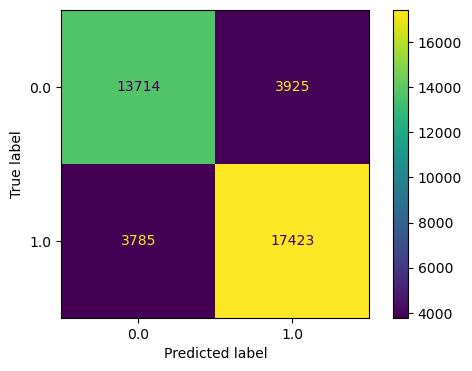

In [108]:
#Confusion matrix

fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(ax=ax)

plt.show()


### Confusion Matrix:
- **(1,1) = 17,423**: True Positives (TP) – correctly predicted as satisfied (positive class).
- **(1,0) = 3,925**: False Negatives (FN) – incorrectly predicted as unsatisfied, but they are satisfied.
- **(0,0) = 13,714**: True Negatives (TN) – correctly predicted as unsatisfied (negative class).
- **(0,1) = 3,785**: False Positives (FP) – incorrectly predicted as satisfied, but they are unsatisfied.

### Interpretation of Metrics:
1. **Accuracy: 0.8015**
   - **Interpretation:** 80.15% of all predictions (both satisfied and unsatisfied) are correct. However, accuracy alone can be misleading when the data is imbalanced.

2. **Precision: 0.8161**
   - **Interpretation:** Of all the instances predicted as satisfied, 81.61% were actually satisfied. Precision focuses on minimizing false positives (cases wrongly predicted as satisfied).

3. **Recall: 0.8215**
   - **Interpretation:** Of all the actual satisfied cases, 82.15% were correctly identified by the model. Recall focuses on minimizing false negatives (cases that are actually satisfied but predicted as unsatisfied).

4. **F1-Score: 0.8188**
   - **Interpretation:** The F1-score is a balance between precision and recall. Here, it’s 81.88%, indicating a good balance between precision and recall.

### Model Performance Insights:
- The model has a relatively high precision and recall, meaning it is both good at identifying satisfied customers (recall) and minimizing false positives (precision).
- The accuracy is quite high, but it should be interpreted along with precision and recall, especially if the classes (satisfied and unsatisfied) are imbalanced.
  
The logistic regression model has learned from `Inflight_entertainment` to predict customer `satisfaction` well, especially given the balanced performance in precision and recall.


- Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

## Conclusion

**Key insights**

*   Logistic regression accurately predicted satisfaction `80.2%` of the time.  
*   In every one unit increase in inflight entertainment rating the log(odds) of the satisfaction increase by `0.99`.
*   The odds of the user being satisfied increase by a factor of `2.712` for each one-unit increase in the inflight entertainment rating.
*   When the inflight entertainment rating increases by one unit, the probability of the user being satisfied is approximately `73.06%`.
*   Of all the instances predicted as satisfied, 81.61% were actually satisfied.
*   Of all the actual satisfied cases, 82.15% were correctly identified by the model.
*   The F1-score is a balance between precision and recall. Here, it’s 81.88%, indicating a good balance between precision and recall.
*   The confusion matrix is useful, as it identifies the (True Positives, True Negatives, False Positives, False Negatives) :

- - **(1,1) = 17,423**: True Positives (TP) – correctly predicted as satisfied (positive class).
- - **(1,0) = 3,925**: False Negatives (FN) – incorrectly predicted as unsatisfied, but they are satisfied.
- - **(0,0) = 13,714**: True Negatives (TN) – correctly predicted as unsatisfied (negative class).
- - **(0,1) = 3,785**: False Positives (FP) – incorrectly predicted as satisfied, but they are unsatisfied.

**Summary for Stakeholders**

*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is `80.2%` accurate. This is an improvement over the dataset's customer satisfaction rate of `54.7%` percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 

